## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [60]:
#write your solution
import pandas as pd

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [61]:
#Read the data into a dataframe
#Inser your code
df = pd.read_csv("goodreads.csv")


#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 

df.head()

4.40 136455  0439023483  good_reads:book  \
0  4.41  16648  0439358078  good_reads:book   
1  3.56  85746  0316015849  good_reads:book   
2  4.23  47906  0061120081  good_reads:book   
3  4.23  34772  0679783261  good_reads:book   
4  4.25  12363  0446675539  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      

                 dir01/2767052-the-hunger-games.html  2958974  \
0  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478   
1                          dir01/41865.Twilight.html  2579564   
2              dir01/2657.To_Kill_a_Mockingbird.html  2078123   
3                dir01/1885.Pride_and_Prejudice.html  1388992   
4                dir01/18405.Gone_with_the_Wind.html   645470   

             The Hunger Games (The Hunger Games, #1)  
0  Harry Potter and the Order of the Phoenix (Har...  
1                            Twilight (Twilight, #1)  
2                              To Kill a Mockingbird  
3                                Pride and Prejudice  
4                                 Gone with the Wind

Lets read the csv file with custom column descriptions specified in the problem statement.

In [62]:
#Read the data into a dataframe specifying column names
df = pd.read_csv("goodreads.csv",names=['rating','review_count','isbn','booktype','author_url','year','genre_urls','dir','rating_count','name'])
df
#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 


rating review_count        isbn         booktype  \
0       4.40       136455  0439023483  good_reads:book   
1       4.41        16648  0439358078  good_reads:book   
2       3.56        85746  0316015849  good_reads:book   
3       4.23        47906  0061120081  good_reads:book   
4       4.23        34772  0679783261  good_reads:book   
...      ...          ...         ...              ...   
5995    4.17         2226  0767913736  good_reads:book   
5996    3.99          775  1416909427  good_reads:book   
5997    3.78          540  1620612321  good_reads:book   
5998    3.91          281         NaN  good_reads:book   
5999    4.35           61  0786929081  good_reads:book   

                                             author_url    year  \
0     https://www.goodreads.com/author/show/153394.S...  2008.0   
1     https://www.goodreads.com/author/show/1077326....  2003.0   
2     https://www.goodreads.com/author/show/941441.S...  2005.0   
3     https://www.goodreads.com/author/show/1825.Har...  1960.0   
4     https://www.goodreads.com/author/show/1265.Jan...  1813.0   
...                                                 ...     ...   
5995  https://www.goodreads.com/author/show/44565.Ca...  2005.0   
5996  https://www.goodreads.com/author/show/151371.J...  2006.0   
5997  https://www.goodreads.com/author/show/5761314....  2012.0   
5998  https://www.goodreads.com/author/show/1201952....  2006.0   
5999  https://www.goodreads.com/author/show/1023510....  2001.0   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
1     /genres/fantasy|/genres/young-adult|/genres/fi...   
2     /genres/young-adult|/genres/fantasy|/genres/ro...   
3     /genres/classics|/genres/fiction|/genres/histo...   
4     /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
5995  /genres/history|/genres/non-fiction|/genres/bi...   
5996  /genres/young-adult|/genres/realistic-fiction|...   
5997  /genres/contemporary|/genres/romance|/genres/y...   
5998  /genres/religion|/genres/islam|/genres/religio...   
5999  /genres/fiction|/genres/fantasy|/genres/magic|...   

                                                    dir rating_count  \
0                   dir01/2767052-the-hunger-games.html      2958974   
1     dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                             dir01/41865.Twilight.html      2579564   
3                 dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                   dir01/1885.Pride_and_Prejudice.html      1388992   
...                                                 ...          ...   
5995                dir60/78508.The_River_of_Doubt.html        16618   
5996                             dir60/259068.Shug.html         6179   
5997                         dir60/13503247-flawed.html         2971   
5998                                 dir60/2750008.html         3083   
5999  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...         3982   

                                                   name  
0               The Hunger Games (The Hunger Games, #1)  
1     Harry Potter and the Order of the Phoenix (Har...  
2                               Twilight (Twilight, #1)  
3                                 To Kill a Mockingbird  
4                                   Pride and Prejudice  
...                                                 ...  
5995                                 The River of Doubt  
5996                                               Shug  
5997                                             Flawed  
5998              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
  
5999  Legacy of the Drow Collector's Edition (Legacy...  

[6000 rows x 10 columns]


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [63]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [64]:

#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.
df.isna().sum()

rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

**Question:** Was the data read correctly and values represented as we expected?

Answer : No

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [65]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()

rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [66]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.rating.isna()]

rating review_count  isbn booktype author_url  year genre_urls  \
3643     NaN         None  None     None       None   NaN        NaN   
5282     NaN         None  None     None       None   NaN        NaN   

                                  dir rating_count  name  
3643  dir37/9658936-harry-potter.html         None  None  
5282     dir53/113138.The_Winner.html         None  None

In [67]:
df.shape

(6000, 10)

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [68]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df.dropna(axis=0, subset=['rating','year'],inplace=True)


In [69]:
df.shape

(5993, 10)

Ok so we have done some cleaning. Is it enough? 

In [70]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [71]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df.rating_count = df.rating_count.astype("int")
df.review_count = df.review_count.astype("int")
df.year = df.year.astype("int")
df.dtypes


rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [72]:
#Insert Your code here
df[df.isbn.isna()]

rating  review_count isbn         booktype  \
16      3.92         38061  NaN  good_reads:book   
49      3.85         11628  NaN  good_reads:book   
85      4.16         14968  NaN  good_reads:book   
116     3.92          8393  NaN  good_reads:book   
156     4.03          3473  NaN  good_reads:book   
...      ...           ...  ...              ...   
5972    4.19          1670  NaN  good_reads:book   
5976    4.23          1185  NaN  good_reads:book   
5977    4.03           218  NaN  good_reads:book   
5991    4.20           650  NaN  good_reads:book   
5998    3.91           281  NaN  good_reads:book   

                                             author_url  year  \
16    https://www.goodreads.com/author/show/498072.A...  2003   
49    https://www.goodreads.com/author/show/5152.Vla...  1955   
85    https://www.goodreads.com/author/show/137902.R...  2007   
116   https://www.goodreads.com/author/show/957894.A...  1942   
156   https://www.goodreads.com/author/show/4785.Ale...  1843   
...                                                 ...   ...   
5972  https://www.goodreads.com/author/show/4586597....  2011   
5976  https://www.goodreads.com/author/show/5160667....  2014   
5977  https://www.goodreads.com/author/show/5769580....  1987   
5991    https://www.goodreads.com/author/show/1112683._  2009   
5998  https://www.goodreads.com/author/show/1201952....  2006   

                                             genre_urls  \
16    /genres/fiction|/genres/romance|/genres/fantas...   
49    /genres/classics|/genres/fiction|/genres/liter...   
85    /genres/young-adult|/genres/teen|/genres/young...   
116   /genres/classics|/genres/fiction|/genres/philo...   
156   /genres/classics|/genres/fiction|/genres/histo...   
...                                                 ...   
5972  /genres/romance|/genres/romance|/genres/contem...   
5976  /genres/romance|/genres/science-fiction|/genre...   
5977  /genres/fiction|/genres/novels|/genres/literat...   
5991  /genres/novels|/genres/fiction|/genres/religio...   
5998  /genres/religion|/genres/islam|/genres/religio...   

                                               dir  rating_count  \
16    dir01/18619684-the-time-traveler-s-wife.html        927254   
49                          dir01/7604.Lolita.html        374886   
85             dir01/18660669-vampire-academy.html        297022   
116                  dir02/49552.The_Stranger.html        307566   
156           dir02/7190.The_Three_Musketeers.html        156968   
...                                            ...           ...   
5972                dir60/12351649-perfection.html         35197   
5976             dir60/20504754-transcendence.html          4942   
5977                            dir60/5948927.html          1607   
5991                            dir60/6976667.html          2899   
5998                            dir60/2750008.html          3083   

                                       name  
16                 The Time Traveler's Wife  
49                                   Lolita  
85    Vampire Academy (Vampire Academy, #1)  
116                            The Stranger  
156                    The Three Musketeers  
...                                     ...  
5972    Perfection (Neighbor from Hell, #2)  
5976                          Transcendence  
5977                             Ø§ÙØªÙÙ  
5991                    Ø£ÙÙØ§Ø­ ÙØ¯Ø³Ø±  
5998  Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
  

[471 rows x 10 columns]

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 




Which book is least rated in which year? To determine this, you need a name column, a rating column, and a year column.

---

In [73]:
df1 = df[['rating','year','name']]
df1

rating  year                                               name
0       4.40  2008            The Hunger Games (The Hunger Games, #1)
1       4.41  2003  Harry Potter and the Order of the Phoenix (Har...
2       3.56  2005                            Twilight (Twilight, #1)
3       4.23  1960                              To Kill a Mockingbird
4       4.23  1813                                Pride and Prejudice
...      ...   ...                                                ...
5995    4.17  2005                                 The River of Doubt
5996    3.99  2006                                               Shug
5997    3.78  2012                                             Flawed
5998    3.91  2006              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ

5999    4.35  2001  Legacy of the Drow Collector's Edition (Legacy...

[5993 rows x 3 columns]

In [74]:
df_rating=df1.groupby("rating")

In [75]:
# finding for heighest rating_count from the dataframe
for key, valuedf in df_rating:
    lowest_review = valuedf[valuedf["rating"] == valuedf.rating.min()]
    print(lowest_review.rating,lowest_review.name, lowest_review.year)
    break

3738    2.0
Name: rating, dtype: float64 3738    Revealing Eden (Save the Pearls, #1)
Name: name, dtype: object 3738    2011
Name: year, dtype: int64


(Conclusion) The book Revealing Eden(Save the pearls, #1) is the minimum rating that is 2 written in the year 2011.

In [76]:
df_rating.groups

{2.0: [3738], 2.77: [5979], 2.9: [2609], 2.97: [5844], 3.01: [5113], 3.03: [5064], 3.05: [2957], 3.08: [5133], 3.09: [4280], 3.12: [5066], 3.15: [931, 5817], 3.18: [4157], 3.19: [5770], 3.2: [5195, 5284], 3.21: [2512, 4446, 4870], 3.22: [5266], 3.23: [2875, 3090], 3.24: [1343, 4533], 3.25: [2403, 3502], 3.28: [3788], 3.29: [5807, 5958], 3.3: [655], 3.31: [1968, 5329], 3.32: [109, 2795, 5931], 3.33: [407], 3.34: [4571], 3.35: [714, 1740, 3458, 4542, 5695], 3.36: [5543, 5981, 5989], 3.37: [3003, 3068, 4709, 5339, 5470], 3.38: [164, 327, 4176, 4762, 5684], 3.39: [2612, 2786, 3376, 4198], 3.4: [89, 2723, 5174], 3.41: [4967, 5964], 3.42: [3464, 3748, 5831], 3.43: [2509, 2799, 3449, 3538, 5244], 3.44: [140, 2770, 4043, 4056, 5072, 5125, 5550], 3.45: [365, 907, 3198, 4221, 4429, 4547, 4669, 4951, 5704], 3.46: [167, 453, 1226, 1423, 1490, 1556, 1692, 1931, 3990, 5286, 5303, 5482], 3.47: [172, 2643, 3604, 4423, 5904], 3.48: [909, 1387, 1655, 3779, 4014, 5142], 3.49: [200, 1664, 1878, 2247, 2798

In [77]:
df.loc[[3738]]

rating  review_count        isbn         booktype  \
3738     2.0           368  0983650322  good_reads:book   

                                             author_url  year  \
3738  https://www.goodreads.com/author/show/9414.Vic...  2011   

                                             genre_urls  \
3738  /genres/young-adult|/genres/science-fiction|/g...   

                                     dir  rating_count  \
3738  dir38/12393909-revealing-eden.html           688   

                                      name  
3738  Revealing Eden (Save the Pearls, #1)

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [78]:
#Get the first author_url
author=df['author_url'][0]
author


'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [79]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
name = author.split(".")[-1]
name

'Suzanne_Collins'

In [80]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_author(url):
  name = url.split(".")[-1]
  return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()



rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [81]:
newdf=df.dropna(subset=['genre_urls'])
newdf.shape

(5934, 11)

In [82]:
#Get first genre_url
#url_genre = df.genre_urls[0]
#url_genre
url_genre = newdf.genre_urls[0]
url_genre

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [83]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######

genre = url_genre.split("/genres/")[1:]
genre
genres = [genre.replace("|","") for genre in genre]
genres

['young-adult',
 'science-fiction',
 'dystopia',
 'fantasy',
 'science-fiction',
 'romance',
 'adventure',
 'book-club',
 'young-adult',
 'teen',
 'apocalyptic',
 'post-apocalyptic',
 'action']

In [84]:
#genre1= "".join(genre)
#genre1.replace("|","/")
genres = "|".join(genres)
genres

'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [85]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_genre(url):
        genres = url.split("/genres/")[1:]
        newgenre = [genre.replace("|","") for genre in genres]
        genres = "|".join(newgenre)
        return genres


newdf['Genres'] = newdf.genre_urls.map(get_genre)
newdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              Genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

EDA

4.1 Univariate(One Variable)

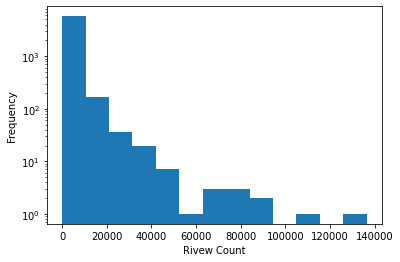

In [86]:
import matplotlib.pyplot as plt
x=df.review_count
plt.hist(x,bins=13, log=True)
plt.xlabel("Rivew Count")
plt.ylabel("Frequency")
plt.show()

Barplot


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [87]:
#Deterime best book each year based on rating. 
df_new= df.groupby("year")
df_new


In [88]:
len(df_new)

293

In [89]:
year_check = df.groupby("year", sort=False)
year_check

In [90]:
# heighest rating_count in year 1999
year_1999 = year_check.get_group(1999)
high_rev = year_1999[year_1999["rating_count"] == year_1999.rating_count.max()]
print(high_rev)

      rating  review_count        isbn         booktype  \
1163    4.47         20000  043965548X  good_reads:book   

                                             author_url  year  \
1163  https://www.goodreads.com/author/show/1077326....  1999   

                                             genre_urls  \
1163  /genres/fiction|/genres/fantasy|/genres/scienc...   

                                                    dir  rating_count  \
1163  dir12/5.Harry_Potter_and_the_Prisoner_of_Azkab...       1293634   

                                                   name       author  
1163  Harry Potter and the Prisoner of Azkaban (Harr...  J_K_Rowling  


In [91]:
# finding for heighest rating_count from the dataframe
for key, valuedf in year_check:
    #print(key)
    #print(valuedf)
    highly_review = valuedf[valuedf["rating_count"] == valuedf.rating_count.max()]
    lowest_review = valuedf[valuedf["rating_count"] == valuedf.rating_count.min()]
    print(highly_review.name, highly_review.year)
    print()
    print(lowest_review.name, lowest_review.year)
    break

0    The Hunger Games (The Hunger Games, #1)
Name: name, dtype: object 0    2008
Name: year, dtype: int64

5494    Huey Lambert's Walking Nuclear Circus
Name: name, dtype: object 5494    2008
Name: year, dtype: int64


In [92]:
highest_ratingcount = year_check['rating_count'].max()
highest_ratingcount 

year
2008    2958974
2003    1284478
2005    2579564
1960    2078123
1813    1388992
         ...   
1391       7029
1621        720
1589      13070
1106       1988
1140       3463
Name: rating_count, Length: 293, dtype: int64

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [93]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 
genre_set=set()
for genre in newdf.Genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
len(genre_set)



537

In [ ]:
#to add columns
for genre in genre_set:
    newdf[genre] = [genre in row.split("|") for row in newdf.Genres]
newdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
genredf = newdf[list(genre_set)]
genredf.head()

In [ ]:
result = genredf.sum()
result = result.sort_values(ascending=False)

x = result.index[:20]
y = result[:20]

In [ ]:
#plot the data here
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#groupby objects
ydf=df.groupby("year")
ydf

In [ ]:
ydf.size()

In [ ]:
ydf.first()

In [ ]:
ydf.last()

In [ ]:
ydf.groups

In [ ]:
ydf.get_group(130)

In [ ]:
ydf.max()

In [ ]:
ydf.mean()

In [ ]:
ydf.sum()

In [ ]:
ydf['rating'].mean()

In [ ]:
ydf[['rating','review_count']].mean()

In [ ]:
ydf.agg({"rating":'max',"review_count":'mean',"rating_count":'min'})

In [ ]:
ydf.agg(['mean','max'])

In [ ]:
for group_name,group in ydf:
  print(group_name)

In [ ]:
df.columns

In [ ]:
df.head()

Data Visualization

 Bar Graph

In [ ]:
#plot the data here
plt.bar(x,y)
plt.title("Genres and it's frequency")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


Histogram

In [ ]:
x = df.rating
plt.hist(x,bins=10)
plt.title('Histogram of rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

4. Scatter Plot

In [ ]:
plt.scatter(df.year,df.rating_count)
plt.show()